In [3]:
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")

In [4]:
import pandas as pd
import numpy as np
from IPython.display import display

# Data Preprocessing
The dataset provided is in the form of one word per line. Let's understand the format of data below:

Suppose there are x words in a sentence, then there will be x continuous lines with one word in each line.
Further, the two sentences are separated by empty lines. The labels for the data follow the same format.
We need to pre-process the data to recover the complete sentences and their labels.

In [5]:
def load_n_preprocess(file_name):
    opened = open(file_name, 'r')
    loaded = opened.readlines()
    opened.close()
    
    all_sentence = []
    sentence = ""

    for word in loaded:
        word = word.strip() # removing any space
        if word == "":
            all_sentence.append(sentence) # To append the final sentence list
#             print(sentence)
#             print("***********")
            sentence = ""
        else:
            if sentence:
                sentence = sentence + " " + word
            else:
                sentence = word
                
    return all_sentence

In [6]:
train_sent = load_n_preprocess('train_sent')
train_label = load_n_preprocess('train_label')
test_sent = load_n_preprocess('test_sent')
test_label = load_n_preprocess('test_label')

In [7]:
def print_sent(sents, label, count=5):
    for i in range(count):
        print("Sentence", i, " : ", sents[i])
        
        display(pd.DataFrame([sents[i].split(), label[i].split()], columns = np.arange(len(sents[i].split())), index = ["sentences", "label"]))
        
#         print("Label", i, " : ", label[i])
#         print( "###################"*5, "\n")

#     https://stackoverflow.com/questions/51288869/print-visually-pleasing-dataframes-in-for-loop-in-jupyter-notebook-pandas

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
opened = open("train_label", 'r')
loaded = opened.readlines()
opened.close()

/var/folders/q_/xgf1500s6kn9v911pn002dgh0000gn/T/ipykernel_45652/3579030051.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


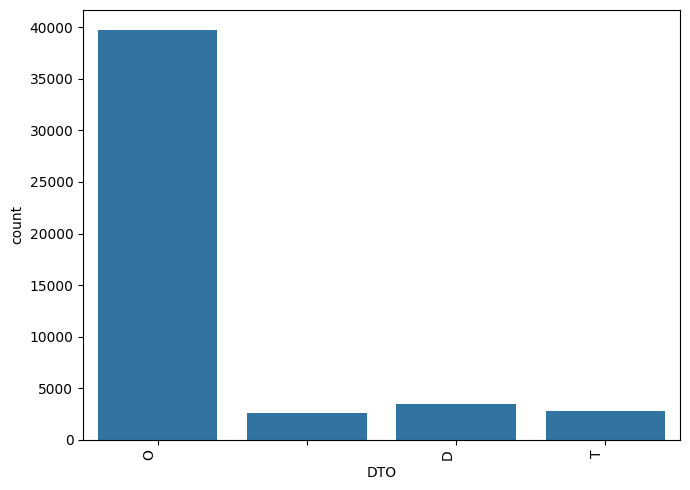

In [13]:
#Words distribution across DTO in train label
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='DTO', data=pd.DataFrame(loaded, columns=["DTO"]), orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [14]:
opened = open("test_label", 'r')
loaded = opened.readlines()
opened.close()

/var/folders/q_/xgf1500s6kn9v911pn002dgh0000gn/T/ipykernel_45652/1709903129.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


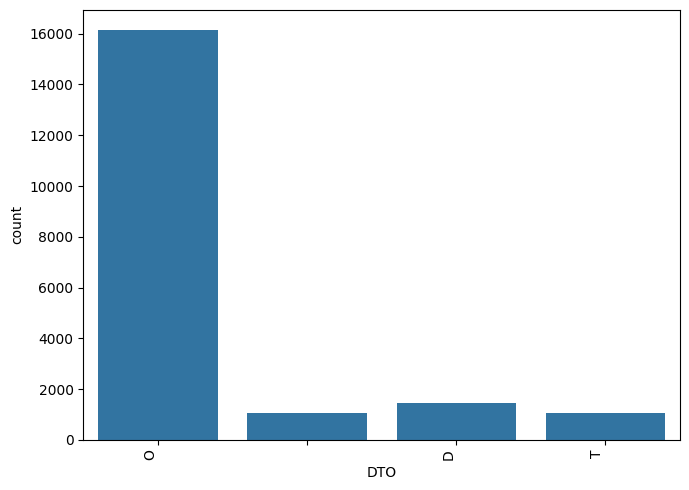

In [15]:
#Words distribution across DTO in test label
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='DTO', data=pd.DataFrame(loaded, columns=["DTO"]), orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# Printing first 5 TRAIN sentence and it's labels

In [16]:
print_sent(train_sent, train_label, count=5)

Sentence 0  :  All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
sentences,All,live,births,>,or,=,23,weeks,at,the,...,",",and,practice,group,(,to,reflect,risk,status,)
label,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O


Sentence 1  :  The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
sentences,The,total,cesarean,rate,was,14.4,%,(,344,of,...,primary,rate,was,11.4,%,(,244,of,2144,)
label,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O


Sentence 2  :  Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sentences,Abnormal,presentation,was,the,most,common,indication,(,25.6,%,",",88,of,344,)
label,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


Sentence 3  :  The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
sentences,The,``,corrected,'',cesarean,rate,(,maternal-fetal,medicine,and,...,primary,rate,was,9.6,%,(,190,of,1975,)
label,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O


Sentence 4  :  Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
sentences,Arrest,of,dilation,was,the,most,common,indication,in,both,...,'',subgroups,(,23.4,and,24.6,%,",",respectively,)
label,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O


Printing first 5 TEST sentence and it's labels

In [17]:
print_sent(test_sent, test_label, count=5)

Sentence 0  :  Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
sentences,Furthermore,",",when,all,deliveries,were,analyzed,",",regardless,of,...,2214,;,primary,9.2,%,",",183,of,1994,)
label,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O


Sentence 1  :  As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
sentences,As,the,ambient,temperature,increases,",",there,is,an,increase,in,insensible,fluid,loss,and,the,potential,for,dehydration
label,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O


Sentence 2  :  The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
sentences,The,daily,high,temperature,ranged,from,71,to,104,degrees,...,ranged,from,1.7,to,24.7,cm,during,the,study,period
label,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O


Sentence 3  :  There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
sentences,There,was,a,significant,correlation,between,the,2-,",",3-,...,=,0.31,",",p,&,#,60,;,0.001,)
label,O,O,O,O,O,O,O,O,O,O,...,O,O,O,O,O,O,O,O,O,O


Sentence 4  :  Fluctuations in ambient temperature are inversely correlated to changes in AFI


,0,1,2,3,4,5,6,7,8,9,10
sentences,Fluctuations,in,ambient,temperature,are,inversely,correlated,to,changes,in,AFI
label,O,O,O,O,O,O,O,O,O,O,O


# Count the number of sentences in the processed train and test dataset

In [18]:
print("No. sentences in processed train dataset is: ", len(train_sent))
print("No. sentences in processed test dataset is: ", len(test_sent))

No. sentences in processed train dataset is:  2599
No. sentences in processed test dataset is:  1056


# Count the number of lines of labels in the processed train and test dataset.

In [19]:
print("No. sentences in processed train dataset is: ", len(train_label))
print("No. sentences in processed test dataset is: ", len(test_label))

No. sentences in processed train dataset is:  2599
No. sentences in processed test dataset is:  1056


# Concept Identification
We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging.

Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency
Extracting NOUN or PROPN using tokens

In [20]:
all_noun_propn = []
all_sentence = train_sent + test_sent

for sentence in all_sentence:
    doc = model(sentence)
    
    for token in doc:
        if token.pos_=="NOUN" or token.pos_ == "PROPN":
            all_noun_propn.append(token.text)

In [21]:
len(all_noun_propn)

24373

# Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [23]:
from nltk import FreqDist

In [24]:
word_frequency = FreqDist(all_noun_propn)

In [25]:
pd.DataFrame(word_frequency.most_common(25), columns=["Sentence", "Count"])

,Sentence,Count
0,patients,492
1,treatment,281
2,%,247
3,cancer,200
4,therapy,175
5,study,153
6,disease,141
7,cell,140
8,lung,116
9,group,94


# Model1:
Using the same code from CRF.ipynb (Custom NER: Python Implementation Part-I)
Defining features for CRF
list of features used:

f1 = serves as word id
f2 = last three characters
f3 = last two characters
f4 = is the word in all uppercase
f5 = is the word a number
f6 = is the word starting with a capital lettes
extra feature: if pos>0:

fx1 = prev_word to lower
fx2 = prev_word is upper
fx3 = prev_word is digits
fx4 = prev_word starts with capital letter
else:

fx1 = BEG(beginning of text)
if pos reached end:

fx1 = ENd(ending of text)

In [26]:
# Let's define the features to get the feature value for one word.

def getFeaturesForOneWord(sentence, pos):
    word = sentence[pos]

    features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'word.startsWithCapital=%s' % word[0].isupper(), # is the word starting with a capital letter
    ]

    #Use the previous word also while defining features
    if(pos > 0):
        prev_word = sentence[pos-1]
        features.extend([
        'prev_word.lower=' + prev_word.lower(), 
        'prev_word.isupper=%s' % prev_word.isupper(),
        'prev_word.isdigit=%s' % prev_word.isdigit(),
        'prev_word.startsWithCapital=%s' % prev_word[0].isupper(),
    ])
    # Mark the begining and the end words of a sentence correctly in the form of features.
    else:
        features.append('BEG') # feature to track begin of sentence 

    if(pos == len(sentence)-1):
        features.append('END') # feature to track end of sentence

    return features

Write a code/function to get the features for a sentence# 

In [27]:
# Function to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list, pos) for pos in range(len(sentence_list))]

# Visualizing the input features

In [28]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[2]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=cesarean',
 'word[-3:]=ean',
 'word[-2:]=an',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=False',
 'prev_word.lower=total',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_word.startsWithCapital=False']

In [29]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[0]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=the',
 'word[-3:]=The',
 'word[-2:]=he',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=True',
 'BEG']

# Write a code/function to get the labels of a sentence

In [30]:
# Write a code to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
    return labels.split()

# Define input and target variables
Correctly computing X and Y sequence matrices for training and test data. Check that both sentences and labels are processed

Define the features' values for each sentence as input variable for CRF model in test and the train dataset

In [31]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_sent]
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_sent]

# Define the labels as the target variable for test and the train dataset

In [32]:
y_train = [getLabelsInListForOneSentence(label) for label in train_label]
y_test = [getLabelsInListForOneSentence(label) for label in test_label]

# Build the CRF Model

In [33]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=100)

In [34]:
repr(crf)

'CRF(max_iterations=100)'

# Tranning model

In [35]:
crf.fit(X_train, y_train)

CRF(max_iterations=100)

# Evaluation
Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.


In [36]:
y_pred = crf.predict(X_test)

# Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [37]:
f1_score = metrics.flat_f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score)

F1 score: 0.9025814007854693


Identifying Diseases and Treatments using Custom NER
We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.

Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.# 

# Creating Dataframe for Disease and Treatments

In [38]:
D_n_T_DF = pd.DataFrame([], columns=["Disease", "Treatments"])
D_n_T_DF

,Disease,Treatments


In [39]:
for i in range(len(y_pred)):

  p_val = y_pred[i]
  dise = ""
  treat = ""

  DTO = set(p_val)
  if "D" in DTO and "T" in DTO:

    for j in range(len(p_val)):
      if p_val[j] == 'D':
        dise += test_sent[i].split()[j] + " "
      elif p_val[j] == 'T':
        treat += test_sent[i].split()[j] + " "

    dise = dise.strip()
    treat = treat.strip()

    present = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Disease"]]
    if present.size:
      treatment_df = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]]
      treatment = treatment_df.values.tolist()
      treatment.extend([treat])
      D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]] = [[treatment]]

    else:
      D_n_T_DF = pd.concat([D_n_T_DF, pd.DataFrame([[dise, treat]], columns=D_n_T_DF.columns )])

D_n_T_DF = D_n_T_DF.set_index(np.arange(D_n_T_DF.shape[0]))
D_n_T_DF

,Disease,Treatments
0,hereditary retinoblastoma,radiotherapy
1,unstable angina or non-Q-wave myocardial infar...,roxithromycin
2,coronary-artery disease,Antichlamydial antibiotics
3,cellulitis,G-CSF therapy intravenous antibiotic treatment
4,early Parkinson 's disease,Ropinirole monotherapy
...,...,...
82,temporomandibular joint arthropathy,arthroscopic treatment
83,severe secondary peritonitis,Surgical management
84,hepatic metastases from colorectal cancer,Hepatic arterial infusion of chemotherapy afte...
85,chronic renal failure,Epoetin


# Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [40]:
dise = 'hereditary retinoblastoma'
D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Disease", "Treatments"]]

,Disease,Treatments
0,hereditary retinoblastoma,radiotherapy


# Model2: Adding POS tag in feature

In [41]:
# Let's define the features to get the feature value for one word.

def getFeaturesForOneWord(sentence, pos, pos_tags):
    word = sentence[pos]

    features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'word.startsWithCapital=%s' % word[0].isupper(), # is the word starting with a capital letter
    'word.pos=' + pos_tags[pos] # adding POS tag here
    ]

    #Use the previous word also while defining features
    if(pos > 0):
        prev_word = sentence[pos-1]
        features.extend([
        'prev_word.lower=' + prev_word.lower(), 
        'prev_word.isupper=%s' % prev_word.isupper(),
        'prev_word.isdigit=%s' % prev_word.isdigit(),
        'prev_word.startsWithCapital=%s' % prev_word[0].isupper(),
        'prev_word.pos=' + pos_tags[pos-1] # adding POS tag here
    ])
    # Mark the begining and the end words of a sentence correctly in the form of features.
    else:
        features.append('BEG') # feature to track begin of sentence 

    if(pos == len(sentence)-1):
        features.append('END') # feature to track end of sentence

    return features

In [42]:
# Function to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    
    # We need to get the pos_tags to be passed to the function
    processed_sent = model(sentence)
    postags = []
    deptags = []
    
    for each_token in processed_sent:
        postags.append(each_token.pos_)
        deptags.append(each_token.dep_) # add dep
    
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list, pos, postags) for pos in range(len(sentence_list))]

In [43]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[2]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=cesarean',
 'word[-3:]=ean',
 'word[-2:]=an',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=False',
 'word.pos=ADJ',
 'prev_word.lower=total',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=ADJ']

In [44]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[0]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=the',
 'word[-3:]=The',
 'word[-2:]=he',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=True',
 'word.pos=DET',
 'BEG']

In [45]:
# Write a code to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
    return labels.split()

In [46]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_sent]
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_sent]

# Define the labels as the target variable for test and the train dataset

In [47]:
y_train = [getLabelsInListForOneSentence(label) for label in train_label]
y_test = [getLabelsInListForOneSentence(label) for label in test_label]

In [49]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=100)

In [50]:
crf.fit(X_train, y_train)

CRF(max_iterations=100)

# Evaluation
Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [51]:
y_pred = crf.predict(X_test)

# Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [52]:
f1_score = metrics.flat_f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score)

F1 score: 0.9070569695262888


# Creating Dataframe for Disease and Treatments

In [53]:
D_n_T_DF = pd.DataFrame([], columns=["Disease", "Treatments"])
D_n_T_DF

,Disease,Treatments


In [54]:
for i in range(len(y_pred)):

  p_val = y_pred[i]
  dise = ""
  treat = ""

  DTO = set(p_val)
  if "D" in DTO and "T" in DTO:

    for j in range(len(p_val)):
      if p_val[j] == 'D':
        dise += test_sent[i].split()[j] + " "
      elif p_val[j] == 'T':
        treat += test_sent[i].split()[j] + " "

    dise = dise.strip()
    treat = treat.strip()

    present = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Disease"]]
    if present.size:
      treatment_df = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]]
      treatment = treatment_df.values.tolist()
      treatment.extend([treat])
      D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]] = [[treatment]]

    else:
      D_n_T_DF = pd.concat([D_n_T_DF, pd.DataFrame([[dise, treat]], columns=D_n_T_DF.columns )])

D_n_T_DF = D_n_T_DF.set_index(np.arange(D_n_T_DF.shape[0]))
D_n_T_DF

,Disease,Treatments
0,hereditary retinoblastoma,radiotherapy
1,myocardial infarction,"warfarin with 80 mg aspirin , or 1 mg warfarin..."
2,unstable angina or non-Q-wave myocardial infar...,roxithromycin
3,coronary-artery disease,Antichlamydial antibiotics
4,primary pulmonary hypertension ( PPH ),fenfluramines
...,...,...
105,temporomandibular joint arthropathy,arthroscopic treatment
106,severe secondary peritonitis,Surgical management
107,hepatic metastases from colorectal cancer,Hepatic arterial infusion of chemotherapy afte...
108,chronic renal failure,Epoetin


# Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [55]:
dise = 'hereditary retinoblastoma'
D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Disease", "Treatments"]]

,Disease,Treatments
0,hereditary retinoblastoma,radiotherapy


# we can see some improvement in accuracy from 90.413 to 90.595
lets try adding Depency tag and see result

# Model3: Adding POS tag and Dependancy tag in feature

In [57]:
# Let's define the features to get the feature value for one word.

def getFeaturesForOneWord(sentence, pos, pos_tags, deptags):
    word = sentence[pos]

    features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'word.startsWithCapital=%s' % word[0].isupper(), # is the word starting with a capital letter
    'word.pos=' + pos_tags[pos], # adding POS tag here
    'word.dep_=' + deptags[pos] # adding DEP tag here
    ]

    #Use the previous word also while defining features
    if(pos > 0):
        prev_word = sentence[pos-1]
        features.extend([
        'prev_word.lower=' + prev_word.lower(), 
        'prev_word.isupper=%s' % prev_word.isupper(),
        'prev_word.isdigit=%s' % prev_word.isdigit(),
        'prev_word.startsWithCapital=%s' % prev_word[0].isupper(),
        'prev_word.pos=' + pos_tags[pos-1], # adding POS tag here
        'word.dep_=' + deptags[pos-1] # adding DEP tag here
    ])
    # Mark the begining and the end words of a sentence correctly in the form of features.
    else:
        features.append('BEG') # feature to track begin of sentence 

    if(pos == len(sentence)-1):
        features.append('END') # feature to track end of sentence

    return features

In [58]:
# Function to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    
    # We need to get the pos_tags to be passed to the function
    processed_sent = model(sentence)
    postags = []
    deptags = []
    
    for each_token in processed_sent:
        postags.append(each_token.pos_)
        deptags.append(each_token.dep_) # add dep
    
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list, pos, postags, deptags) for pos in range(len(sentence_list))]


In [59]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[2]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=cesarean',
 'word[-3:]=ean',
 'word[-2:]=an',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=False',
 'word.pos=ADJ',
 'word.dep_=amod',
 'prev_word.lower=total',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=ADJ',
 'word.dep_=amod']

In [60]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[0]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=the',
 'word[-3:]=The',
 'word[-2:]=he',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=True',
 'word.pos=DET',
 'word.dep_=det',
 'BEG']

In [61]:
# Write a code to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
    return labels.split()

In [62]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_sent]
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_sent]

# Define the labels as the target variable for test and the train dataset

In [63]:
y_train = [getLabelsInListForOneSentence(label) for label in train_label]
y_test = [getLabelsInListForOneSentence(label) for label in test_label]

In [64]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=100)

In [65]:
crf.fit(X_train, y_train)

CRF(max_iterations=100)

# Evaluation
Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [66]:
y_pred = crf.predict(X_test)

# Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [67]:
f1_score = metrics.flat_f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score)

F1 score: 0.9062715131691922


# Creating Dataframe for Disease and Treatments

In [68]:
D_n_T_DF = pd.DataFrame([], columns=["Disease", "Treatments"])
D_n_T_DF

,Disease,Treatments


In [69]:
for i in range(len(y_pred)):

  p_val = y_pred[i]
  dise = ""
  treat = ""

  DTO = set(p_val)
  if "D" in DTO and "T" in DTO:

    for j in range(len(p_val)):
      if p_val[j] == 'D':
        dise += test_sent[i].split()[j] + " "
      elif p_val[j] == 'T':
        treat += test_sent[i].split()[j] + " "

    dise = dise.strip()
    treat = treat.strip()

    present = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Disease"]]
    if present.size:
      treatment_df = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]]
      treatment = treatment_df.values.tolist()
      treatment.extend([treat])
      D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]] = [[treatment]]

    else:
      D_n_T_DF = pd.concat([D_n_T_DF, pd.DataFrame([[dise, treat]], columns=D_n_T_DF.columns )])

D_n_T_DF = D_n_T_DF.set_index(np.arange(D_n_T_DF.shape[0]))
D_n_T_DF

,Disease,Treatments
0,hereditary retinoblastoma,radiotherapy
1,myocardial infarction,"warfarin with 80 mg aspirin , or 1 mg warfarin..."
2,unstable angina or non-Q-wave myocardial infar...,roxithromycin
3,coronary-artery disease,Antichlamydial antibiotics
4,essential hypertension,moxonidine
...,...,...
105,temporomandibular joint arthropathy,arthroscopic treatment
106,severe secondary peritonitis,Surgical management
107,hepatic metastases from colorectal cancer,Hepatic arterial infusion of chemotherapy afte...
108,chronic renal failure,Epoetin


# Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [70]:
dise = 'hereditary retinoblastoma'
D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Disease", "Treatments"]]

,Disease,Treatments
0,hereditary retinoblastoma,radiotherapy


# we can see some improvement in accuracy from 90.595 to 90.693
lets try increasing max_iterations to 500

# Model 4: max_iterations to 500

In [72]:
# Let's define the features to get the feature value for one word.

def getFeaturesForOneWord(sentence, pos, pos_tags, deptags):
    word = sentence[pos]

    features = [
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'word.startsWithCapital=%s' % word[0].isupper(), # is the word starting with a capital letter
    'word.pos=' + pos_tags[pos], # adding POS tag here
    'word.dep_=' + deptags[pos] # adding DEP tag here
    ]

    #Use the previous word also while defining features
    if(pos > 0):
        prev_word = sentence[pos-1]
        features.extend([
        'prev_word.lower=' + prev_word.lower(), 
        'prev_word.isupper=%s' % prev_word.isupper(),
        'prev_word.isdigit=%s' % prev_word.isdigit(),
        'prev_word.startsWithCapital=%s' % prev_word[0].isupper(),
        'prev_word.pos=' + pos_tags[pos-1], # adding POS tag here
        'word.dep_=' + deptags[pos-1] # adding DEP tag here
    ])
    # Mark the begining and the end words of a sentence correctly in the form of features.
    else:
        features.append('BEG') # feature to track begin of sentence 

    if(pos == len(sentence)-1):
        features.append('END') # feature to track end of sentence

    return features

In [73]:
# Function to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    
    # We need to get the pos_tags to be passed to the function
    processed_sent = model(sentence)
    postags = []
    deptags = []
    
    for each_token in processed_sent:
        postags.append(each_token.pos_)
        deptags.append(each_token.dep_) # add dep
    
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list, pos, postags, deptags) for pos in range(len(sentence_list))]

In [74]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[2]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=cesarean',
 'word[-3:]=ean',
 'word[-2:]=an',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=False',
 'word.pos=ADJ',
 'word.dep_=amod',
 'prev_word.lower=total',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=ADJ',
 'word.dep_=amod']

In [75]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_sent[1]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[0]

The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )


['word.lower=the',
 'word[-3:]=The',
 'word[-2:]=he',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=True',
 'word.pos=DET',
 'word.dep_=det',
 'BEG']

In [76]:
# Write a code to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
    return labels.split()

In [77]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_sent]
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_sent]

# Define the labels as the target variable for test and the train dataset

In [78]:
y_train = [getLabelsInListForOneSentence(label) for label in train_label]
y_test = [getLabelsInListForOneSentence(label) for label in test_label]

In [79]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=500)

In [80]:
crf.fit(X_train, y_train)

CRF(max_iterations=500)

# Evaluation
Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.


In [81]:
y_pred = crf.predict(X_test)

# Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [82]:
f1_score = metrics.flat_f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1_score)

F1 score: 0.9127525030310327


# Creating Dataframe for Disease and Treatments

In [83]:
D_n_T_DF = pd.DataFrame([], columns=["Disease", "Treatments"])
D_n_T_DF

,Disease,Treatments


In [84]:
for i in range(len(y_pred)):

  p_val = y_pred[i]
  dise = ""
  treat = ""

  DTO = set(p_val)
  if "D" in DTO and "T" in DTO:

    for j in range(len(p_val)):
      if p_val[j] == 'D':
        dise += test_sent[i].split()[j] + " "
      elif p_val[j] == 'T':
        treat += test_sent[i].split()[j] + " "

    dise = dise.strip()
    treat = treat.strip()

    present = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Disease"]]
    if present.size:
      treatment_df = D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]]
      treatment = treatment_df.values.tolist()
      treatment.extend([treat])
      D_n_T_DF.loc[(D_n_T_DF.Disease == dise), ["Treatments"]] = [[treatment]]

    else:
      D_n_T_DF = pd.concat([D_n_T_DF, pd.DataFrame([[dise, treat]], columns=D_n_T_DF.columns )])

D_n_T_DF = D_n_T_DF.set_index(np.arange(D_n_T_DF.shape[0]))
D_n_T_DF

,Disease,Treatments
0,cancer hereditary retinoblastoma,radiotherapy
1,unstable angina or non-Q-wave myocardial infar...,roxithromycin
2,coronary-artery disease,Antichlamydial antibiotics
3,primary pulmonary hypertension ( PPH ),fenfluramines
4,essential hypertension,moxonidine
...,...,...
106,temporomandibular joint arthropathy,arthroscopic treatment
107,severe secondary peritonitis,Surgical management
108,hepatic metastases from colorectal cancer,Hepatic arterial infusion of chemotherapy afte...
109,epithelial ovarian cancer,High-dose chemotherapy
